# Hw4 (spectrogram)

Mirpulatov Islombek

PHD-1, CDSE

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Add 4th wave packet (frequency = 4 and time_shift = 7 cycles). Demonstrate the effect on the plot of the FFT spectrum (1 point)

In [2]:
def create_wave(t):
    y = 13 * np.sin(1.5 * t) * np.exp(-(t - 6 * 3.5 * np.pi)**2/2/20**2)
    y += 7 * np.sin(3.3 * t) * np.exp(-(t - 4 * 3* np.pi)**2/2/20**2)
    y += 5 * np.sin(4.13 * t) * np.exp(-(t - 13 * np.pi)**2/2/20**2)
    y += 17 * np.sin(t) * np.exp(-(t - np.pi)**2/2/20**2)
    return y

In [3]:
t = np.linspace(-20 * 2 * np.pi, 20 * 2 * np.pi, 2**13)
y = create_wave(t)

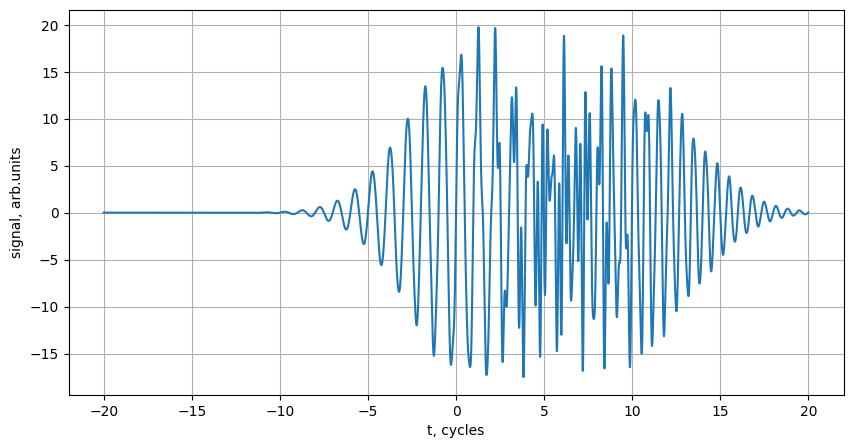

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(t/2/np.pi, y)
plt.xlabel('t, cycles')
plt.ylabel('signal, arb.units')
plt.grid()
plt.show()

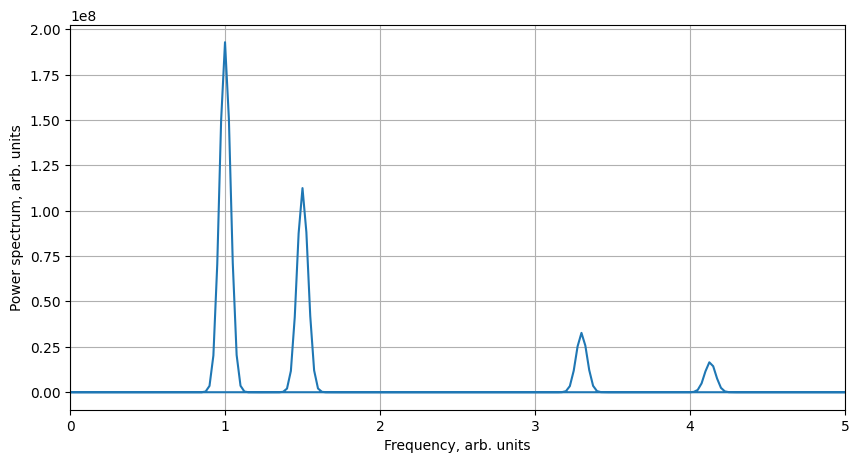

In [5]:
plt.figure(figsize=(10, 5))
sp = np.fft.fft(y)
w = np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/np.pi)
plt.plot(w, abs(sp)**2)
plt.xlim(0, 5)
plt.grid()
plt.xlabel('Frequency, arb. units')
plt.ylabel('Power spectrum, arb. units')
plt.show()

## 2. Implement the spectrogram, show the effect of (1) on the spectrogram. Don’t forget to label the axes (2 points)

In [6]:
def get_specgram(start_pos, stop_pos, nwindowsteps=10000):

    window_positions = np.linspace(start_pos, stop_pos, nwindowsteps)
    window_width = 2.0*2*np.pi

    specgram = np.empty([len(t), nwindowsteps])

    for i, window_position in enumerate(window_positions):
        y_window=y * np.exp(- (t - window_position) ** 2 / 2 / window_width ** 2)
        specgram[:,i]=abs(np.fft.fft(y_window))

    return specgram

In [7]:
spectogram = get_specgram(-20 * 2 * np.pi, 20 * 2 * np.pi, nwindowsteps = 10000)

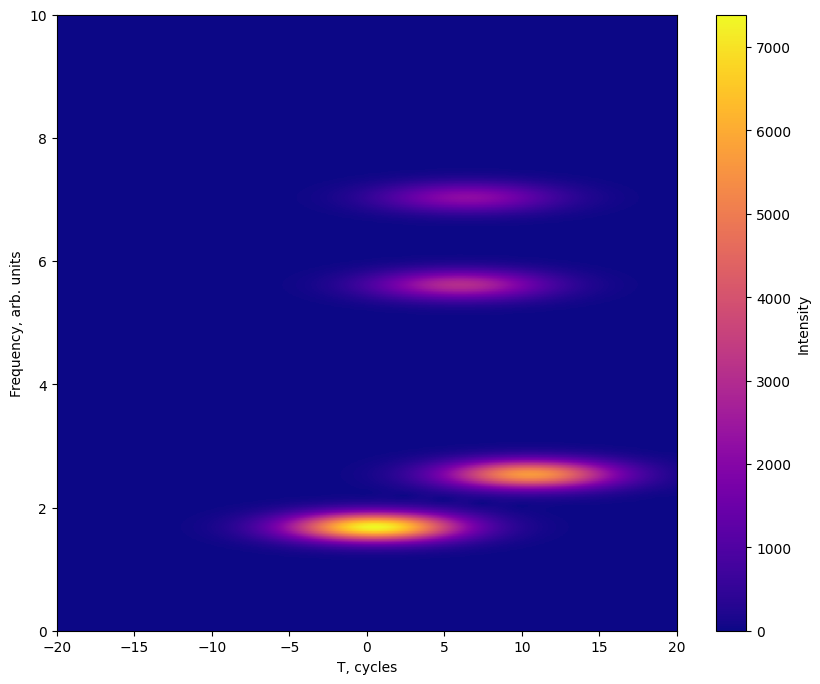

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylim(0, 10)
spec = ax.imshow(spectogram, aspect='auto', cmap='plasma',
               extent=[-20, 20, 0, 350])
fig.colorbar(spec, ax=ax, label='Intensity')
ax.set_xlabel('T, cycles')
ax.set_ylabel('Frequency, arb. units')
plt.show()

## 3. Change the number of time steps in your signal to the power of 2 (i.e. 2**14) and then slightly change the number of timesteps (i.e 2/**14 +- 5). Measure the timing, can you explain the difference? Write something as a possible explanation. (2 points)

In [9]:
import time

In [ ]:
times = []
for i in range(9, 17):
    print(i)
    t = np.linspace(-20 * 2 * np.pi, 20 * 2 * np.pi, 2 ** i)
    y = create_wave(t)

    start_time = time.time()

    spectogram = get_specgram(-20 * 2 * np.pi, 20 * 2 * np.pi)

    end_time = time.time()
    elapsed_time = end_time - start_time
    
    times.append(elapsed_time)

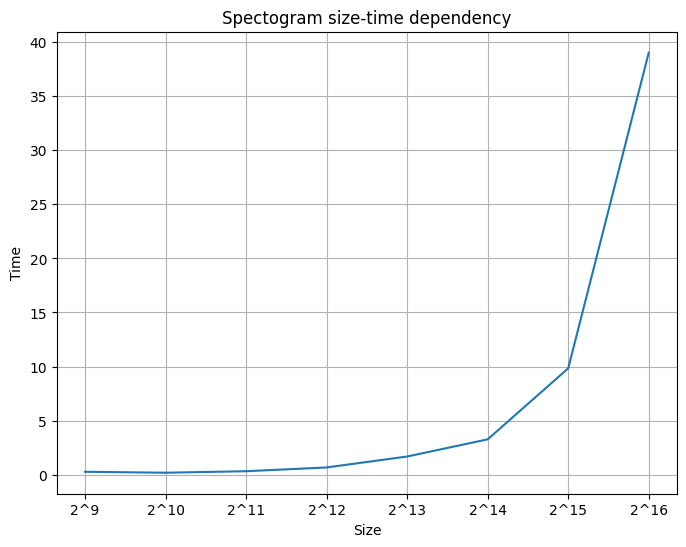

In [20]:
plt.figure(figsize=(8, 6))
sizes = list(range(9, 17))
sizes = [f"2^{s}" for s in sizes]

plt.title("Spectogram size-time dependency")
plt.xlabel("Size")
plt.ylabel("Time")
plt.grid()
plt.plot(sizes, times);

As anticipated, with a doubling of the sample size, the processing speed of spectrogram generation increases. Moreover, this increase follows a quadratic growth pattern. It is worth noting that for windowed Fourier transformation, the time complexity is approximately O(N^2 logN). Similar trends can be observed here, although there is a slight difference due to modifications in the implementation.